![Institute of Coding](assets/header.png)



![Cover image for Face recognition with scikit-learn (sklearn) SVM ](assets/svm-header.png)

Face recognition, or facial recognition, is one of the most common artificial intelligence and machine learning application across all sectors. The problem has been around for nearly half a century. We will cover the most basic face recognition application using support vector machines (SVM) of the scikit-learn (sklearn) library.

For training and testing of the face recognition model, we will use the olivetti face dataset which collected in AT&T Laboratories Cambridge, between 1992 and 1994. Olivetti face dataset contains 400 face images of 40 people, 10 face images each, in grayscale.

# Downloading and loading dataset

Luckily, scikit-learn provides utilities for downloading and loading olivetti face dataset. We can load the dataset with a single line of code.

In [1]:
from sklearn import datasets

data = datasets.fetch_olivetti_faces()

Let's rename the dataset's contents for easier and more convenient access.

In [2]:
# rename dataset for easy access
X = data["data"]
imgs = data["images"]
y = data["target"]

# Preview of the Dataset

Before directly diving into classification, let's see a preview of the dataset. To do that, we'll plot first face image of every person, 40 faces in total using the matplotlib library.

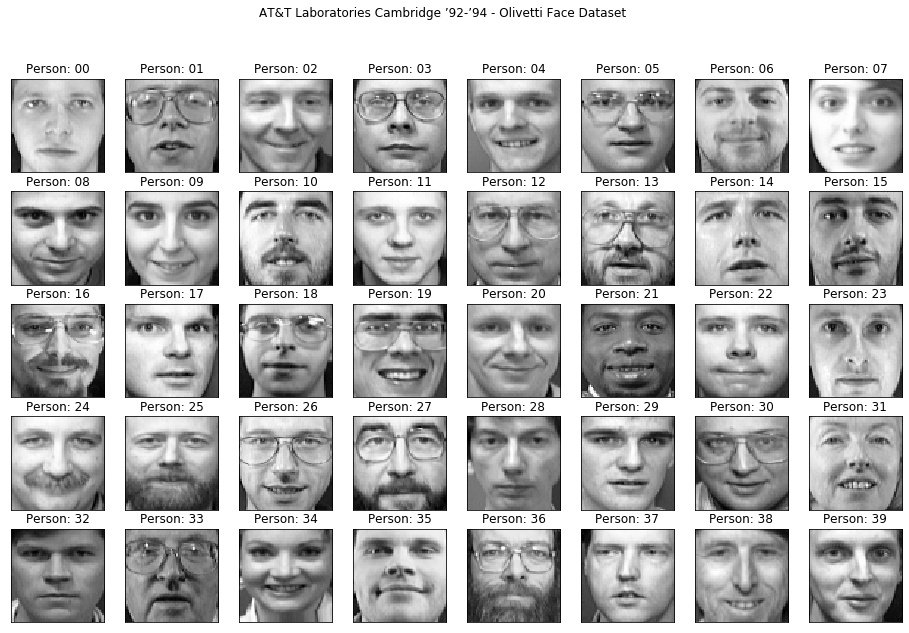

In [3]:
%matplotlib inline
from math import ceil
from matplotlib import pyplot as plt

# select unique people ids
people_ids = set(y)

# setting layout for subplots.
n_cols = 8
n_rows = ceil(len(people_ids) / n_cols)
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16, 10))

# iterate over the ids of people and plot first image for each of them
for person_id in people_ids:
    # finding indexes of the person_id
    person_ixs = y == person_id
    # selecting the images of the person and picking the first one for preview
    image = data["images"][person_ixs][0]
    # plotting the image as grayscale
    axes[person_id // n_cols][person_id % n_cols].imshow(image, cmap="gray")
    # setting subplot title
    title = "Person: {:02d}".format(person_id)
    axes[person_id // n_cols][person_id % n_cols].set_title(title)

# removing ticks on x & y axis
plt.setp(axes, xticks=[], yticks=[])

# setting general plot title
plt.suptitle("AT&T Laboratories Cambridge ’92-’94 - Olivetti Face Dataset")

plt.show()

We will approach face recognition problem as a classification problem where subject (person) ids are the classes, and face images are the samples. Trying to identify person id from a face image will be a classical classification problem. 

Although, a preprocessing operation over the data is needed for most machine learning problems, the olivetti dataset has been already preprocessed, therefore we don't need to do anything. The landmarks of the faces of all subjects are aligned to the same position, the colors are mapped to 256 shades of grey with no hair and background for every image in the dataset.

Yet, we still need to split the data into train and test split, so that we can measure the performance of our SVM model. In order to split face images equally, we'll use `StratifiedShuffleSplit` class of sklearn which enables us to create randomized train and test sets for a cross validation with equal train/test ratio for all classes.


In [4]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

# split data randomly into train & test sets by preserving train/test ratio across classes
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

# get the train and test indexes
train_index, test_index = next(sss.split(X, y))

# split X and y into train & test sets
X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

# Print statistics about it
print(f"Train data size: {len(y_train)}")
print(f"Test data size : {len(y_test)}")

Train data size: 320
Test data size : 80


As can be seen above, we split train & test sets using %80 and %20 of the data, respectively. We can access training data as `X_train`, test data as `X_test`, train labels are `y_train`, and test labels as `y_test`.

# Classification

Since we have all the the data we need, we can go into classification phase. Scikit-learn provides many classification methods in a general classification interface. We will use Support Vector Machines (SVM) classifier among all classifiers scikit provides.

First define the classifier.

In [5]:
from sklearn.svm import SVC
import timeit

# define the SVM classifier with a Radial Basis Function (RBF) kernel.
classifier = SVC(kernel="rbf", gamma="scale", random_state=0)

Then using training data and labels, train the classifier model using the `fit` function.

In [6]:
# train the classifier and keep track of the time for training.
time = timeit.timeit(lambda: classifier.fit(X_train, y_train), number=1)
print(f"Training completed in {time:.2f} secs.")

Training completed in 1.03 secs.


As we have completed training of the classifier, let's see what it predicts when we try to classify our test data.

In [7]:
y_pred = classifier.predict(X_test)

In order to measure the performance of the classifier, we can use `accuracy_score` metric of the scikit-learn library. Accuracy score is the percentage of correctly predicted samples among all test samples.

In [8]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {100 * accuracy:.2f}%")

num_correct = np.sum(y_test == y_pred)
print(f"Number of correctly classified samples: {num_correct}")

num_incorrect = len(y_test) - num_correct
print(f"Number of incorrectly classified samples: {num_incorrect}")

Accuracy score: 95.00%
Number of correctly classified samples: 76
Number of incorrectly classified samples: 4


With a couple of lines, we have successfully created a face recognition model which works quite good! 